In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
# 현재 파일이 실행되는 디렉토리 경로를 기준으로
current_dir = os.getcwd()  # 또는 os.path.dirname(os.path.abspath(__file__))

for dirname, _, filenames in os.walk(current_dir + "/kaggle/input"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/home/younggun0816/GN/kaggle/input/sample_submission(3).csv
/home/younggun0816/GN/kaggle/input/test(2).csv
/home/younggun0816/GN/kaggle/input/train(1).csv


In [2]:
import torch
print(torch.version.cuda)
print(torch.cuda.is_available())

12.1
True


In [5]:
import sys
print(sys.executable)


/home/younggun0816/anaconda3/envs/ml/bin/python


In [3]:
import os
#install required packages
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)



2.4.1


In [36]:
!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

# Helper function for visualization.
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt

  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [17 lines of output]
      Traceback (most recent call last):
        File "/home/younggun0816/GNN/venv/lib64/python3.9/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 353, in <module>
          main()
        File "/home/younggun0816/GNN/venv/lib64/python3.9/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
        File "/home/younggun0816/GNN/venv/lib64/python3.9/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 118, in get_requires_for_build_wheel
          return hook(config_settings)
        File "/tmp/pip-build-env-0r7st5df/overlay/lib/python3.9/site-packages/setuptools/build_meta.py", line 332, in get_requires_for_build_wheel
          return self._get_build_requires(config_settings, requirements=

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7fa5b03a6700>>
Traceback (most recent call last):
  File "/home/younggun0816/GNN/venv/lib64/python3.9/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 
/home/younggun0816/GNN/venv/lib64/python3.9/site-packages/networkx/utils/backends.py:135: RuntimeWarning: networkx backend defined more than once: nx-loopback
  backends.update(_get_backends("networkx.backends"))


In [4]:
import torch.nn as nn
import torch.nn.functional as F

# from torch_geometric.utils import to_networkx
from torch.nn import Linear
from torch_geometric.nn import GCNConv

In [5]:
train_df = pd.read_csv("/home/younggun0816/GN/kaggle/input/train(1).csv")
print(train_df.head(5))
test_df = pd.read_csv("/home/younggun0816/GN/kaggle/input/test(2).csv")
print(test_df.head(5))
sample = pd.read_csv("/home/younggun0816/GN/kaggle/input/sample_submission(3).csv")
print(sample.head(5))

           City        Vehicle Type                Weather Economic Condition  \
0     TechHaven  Autonomous Vehicle                  Rainy            Booming   
1   MetropolisX  Autonomous Vehicle  Electromagnetic Storm            Booming   
2  SolarisVille          Flying Car                  Clear             Stable   
3     TechHaven  Autonomous Vehicle            Solar Flare          Recession   
4      AquaCity  Autonomous Vehicle                  Clear            Booming   

  Day Of Week  Hour Of Day     Speed  Is Peak Hour  Random Event Occurred  \
0     Tuesday            7   22.2585             1                      0   
1     Tuesday           14   73.7549             0                      0   
2     Tuesday           20   96.3520             0                      0   
3      Sunday           23   78.1619             0                      0   
4      Friday            4  108.0000             0                      0   

   Energy Consumption  Traffic Density  
0        

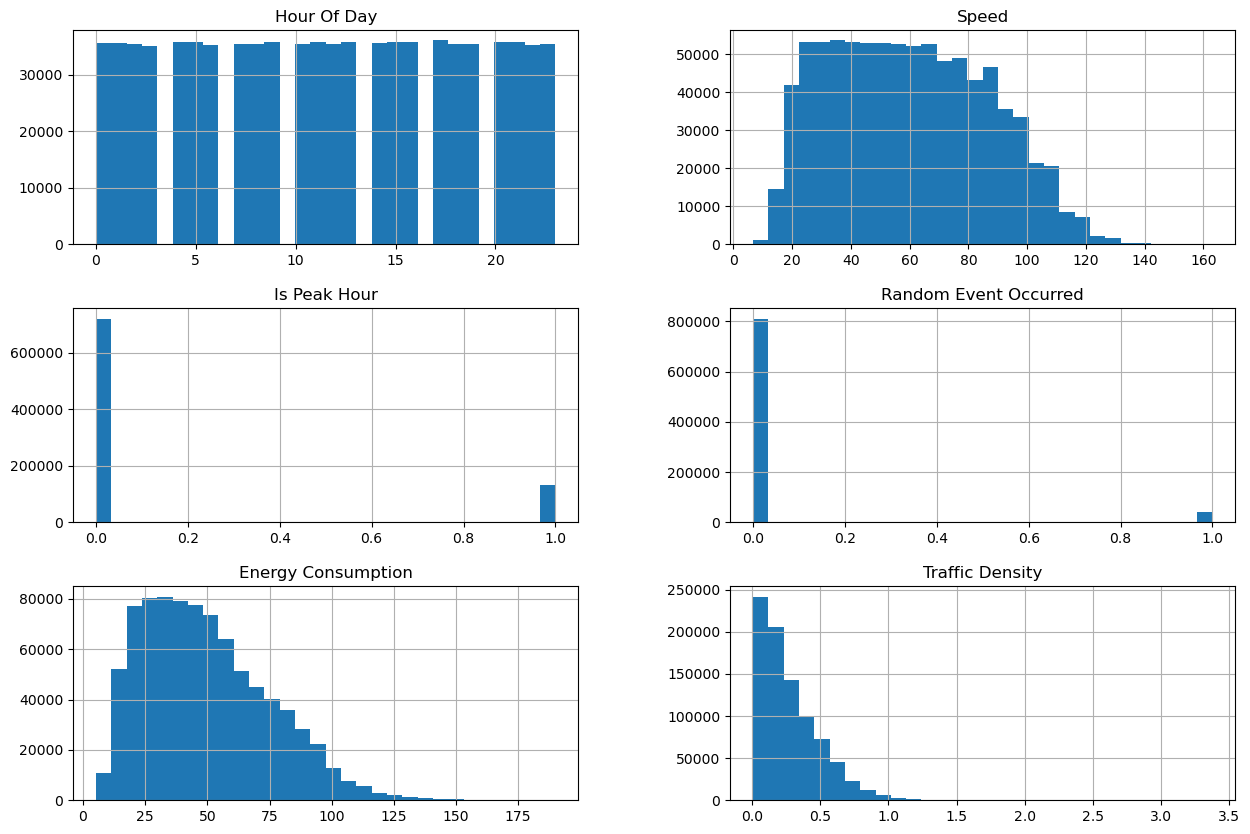

In [32]:
import matplotlib.pyplot as plt
train_df.hist(bins=30, figsize=(15, 10))
plt.show()

/tmp/ipykernel_2453909/171005885.py:24: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 그래프 간의 간격을 자동으로 조정
/tmp/ipykernel_2453909/171005885.py:24: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 그래프 간의 간격을 자동으로 조정
/tmp/ipykernel_2453909/171005885.py:24: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 그래프 간의 간격을 자동으로 조정
/tmp/ipykernel_2453909/171005885.py:24: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 그래프 간의 간격을 자동으로 조정
/tmp/ipykernel_2453909/171005885.py:24: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 그래프 간의 간격을 자동으로 조정
/home/younggun0816/anaconda3/envs/mll/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from 

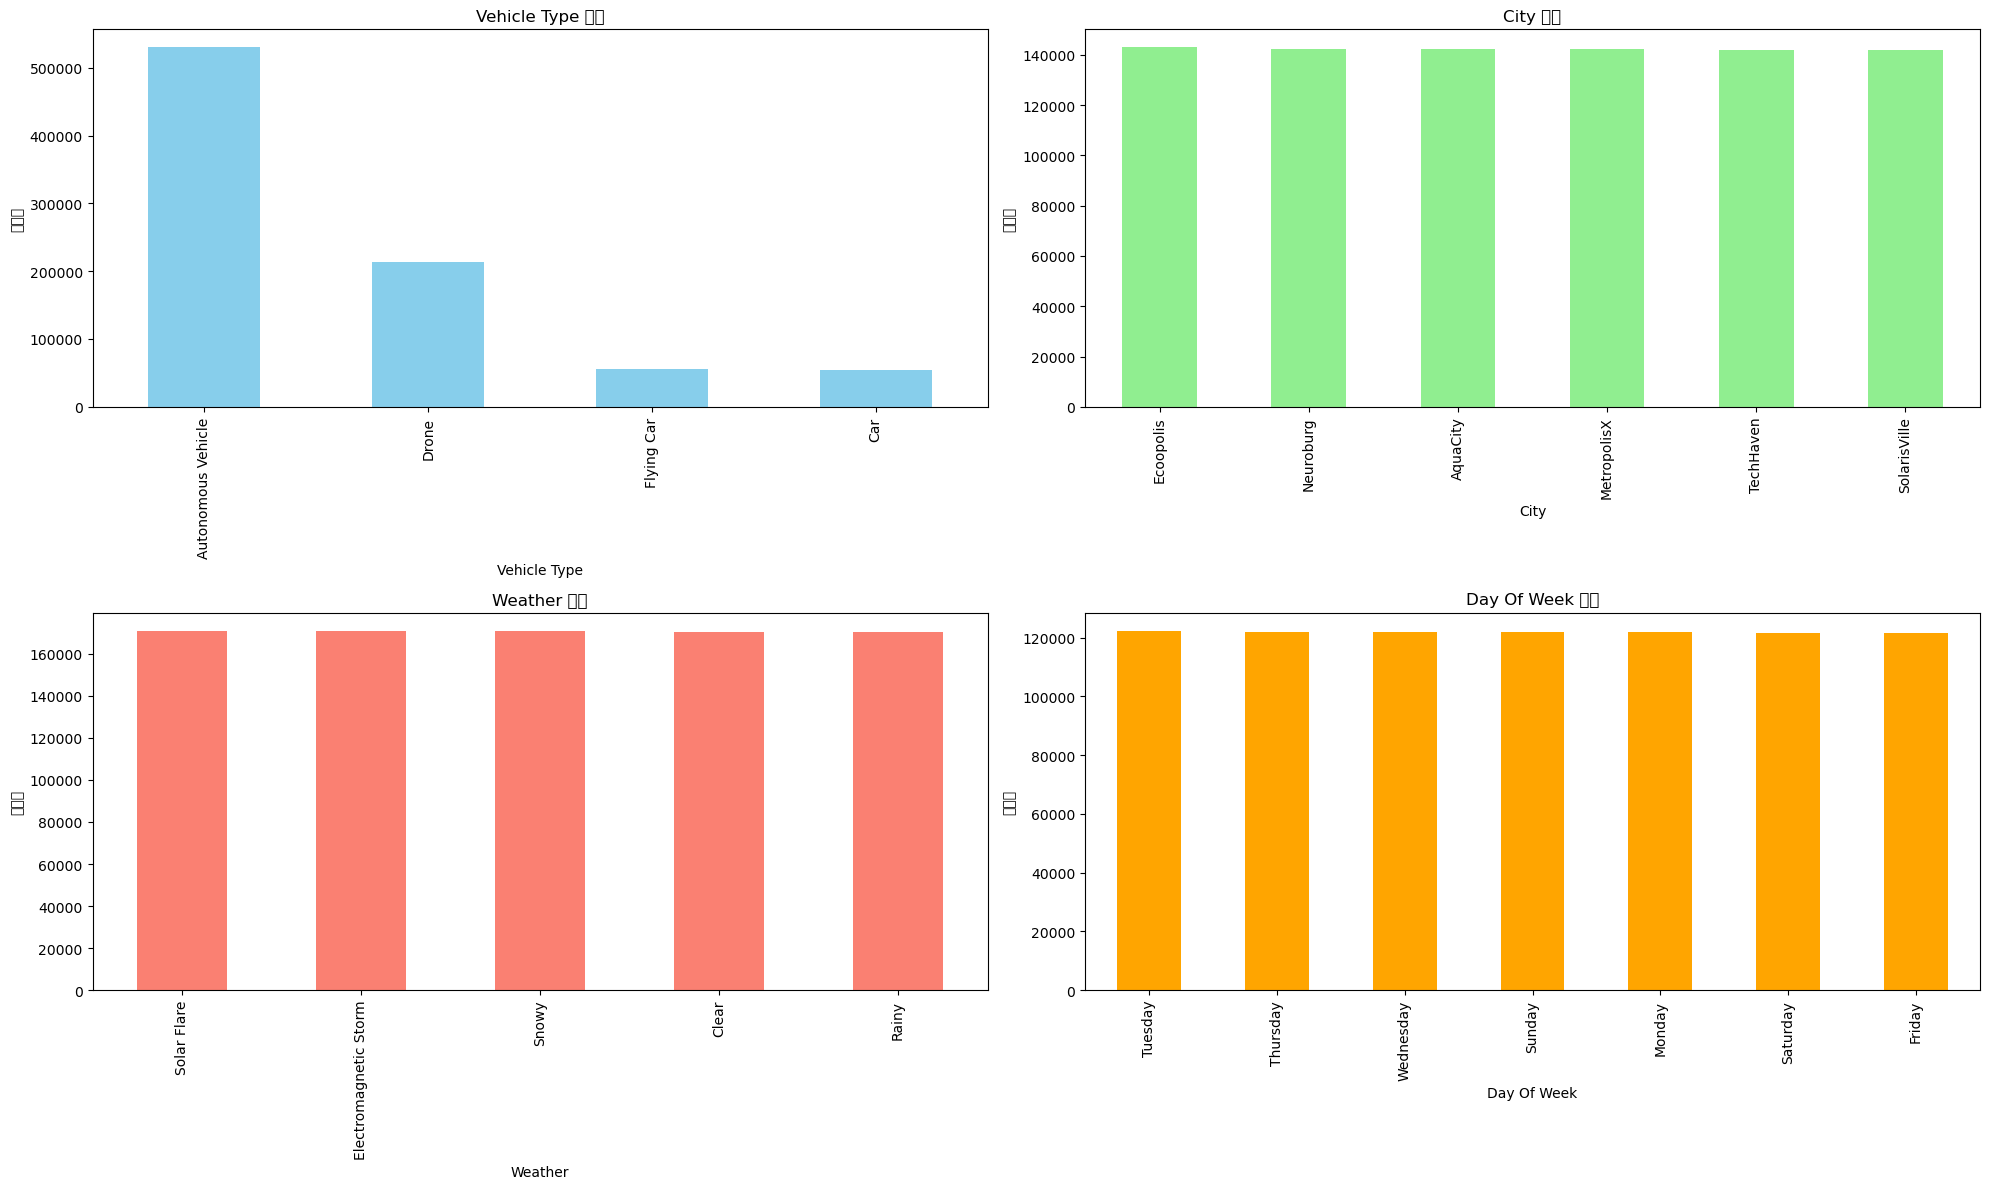

In [34]:
fig, axes = plt.subplots(2, 2, figsize=(20, 12))  # 2x2 서브플롯 생성

# 각 서브플롯에 범주형 데이터의 막대그래프를 그리기
train_df['Vehicle Type'].value_counts().plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Vehicle Type 분포')
axes[0, 0].set_xlabel('Vehicle Type')
axes[0, 0].set_ylabel('빈도수')

train_df['City'].value_counts().plot(kind='bar', ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('City 분포')
axes[0, 1].set_xlabel('City')
axes[0, 1].set_ylabel('빈도수')

train_df['Weather'].value_counts().plot(kind='bar', ax=axes[1, 0], color='salmon')
axes[1, 0].set_title('Weather 분포')
axes[1, 0].set_xlabel('Weather')
axes[1, 0].set_ylabel('빈도수')

train_df['Day Of Week'].value_counts().plot(kind='bar', ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Day Of Week 분포')
axes[1, 1].set_xlabel('Day Of Week')
axes[1, 1].set_ylabel('빈도수')

plt.tight_layout()  # 그래프 간의 간격을 자동으로 조정
plt.show()


In [57]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

def encode_features(df):
    # 로그 변환 후 정규화 및 표준화 적용
    def log_transform_and_scale(column):
        log_column = np.log(column)
        min_max_scaler = MinMaxScaler()
        std_scaler = StandardScaler()
        normalized = min_max_scaler.fit_transform(log_column.values.reshape(-1, 1))
        standardized = std_scaler.fit_transform(log_column.values.reshape(-1, 1))
        return normalized, standardized

    # Speed 처리 (로그 변환 -> 정규화 -> 표준화)
    df['log_Speed'] = np.log(df['Speed'])
    df['normalized_log_Speed'], df['standardized_log_Speed'] = log_transform_and_scale(df['Speed'])

    # Is_Peak_Hour 처리 (가중치 부여)
    df['Is_Peak_Hour_Weighted'] = df['Is Peak Hour'] * 2  # 가중치 부여

    # Energy Consumption 처리 (로그 변환 -> 정규화 -> 표준화)
    df['log_Energy_Consumption'] = np.log(df['Energy Consumption'])
    df['normalized_log_Energy_Consumption'], df['standardized_log_Energy_Consumption'] = log_transform_and_scale(df['Energy Consumption'])

    # 시간대를 4개의 구간으로 나누어 범주형 인코딩
    def categorize_hour(hour):
        if 0 <= hour <= 6:
            return 0  # 밤 시간대
        elif 7 <= hour <= 10:
            return 1  # 붐비는 아침 시간대
        elif 11 <= hour <= 17:
            return 2  # 점심 이후 붐비는 시간대
        else:
            return 3  # 저녁 시간대
        

    df['Hour_Category'] = df['Hour Of Day'].map(categorize_hour)
    
    # 요일을 월화수목금/토일로 구분하여 이진 인코딩
    def weekday_weekend(day):
        if day in ['Saturday', 'Sunday']:
            return 0  # 주말
        else:
            return 1  # 평일

    df['Weekday_Weekend'] = df['Day Of Week'].map(weekday_weekend)

    # One-Hot Encoding 처리할 피처들
    one_hot_columns = ['City', 'Vehicle Type', 'Weather', 'Economic Condition']
    encoder = OneHotEncoder(sparse_output=False)

    # 모든 피처에 대해 One-Hot Encoding 한 번에 적용
    encoded = encoder.fit_transform(df[one_hot_columns])
    encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(one_hot_columns))
    
    # 인코딩된 피처를 원본 데이터프레임에 추가
    df = pd.concat([df, encoded_df], axis=1)

    # 최종 피처들만 선택하여 반환
    final_features = df[[
        'standardized_log_Speed', 'Is_Peak_Hour_Weighted', 'Random Event Occurred',
        'standardized_log_Energy_Consumption', 'Weekday_Weekend', 'Hour_Category'
    ] + list(encoder.get_feature_names_out(one_hot_columns))]

    return final_features

# 인코딩된 피처 반환
encoded_train = encode_features(train_df)
print(encoded_train)


        standardized_log_Speed  Is_Peak_Hour_Weighted  Random Event Occurred  \
0                    -1.722799                      2                      0   
1                     0.635483                      0                      0   
2                     1.161579                      0                      0   
3                     0.749723                      0                      0   
4                     1.386228                      0                      0   
...                        ...                    ...                    ...   
853691                0.666722                      0                      0   
853692               -0.006488                      0                      0   
853693                1.193541                      0                      0   
853694                1.017841                      0                      0   
853695                1.502560                      0                      0   

        standardized_log_Energy_Consump

NameError: name 'plt' is not defined

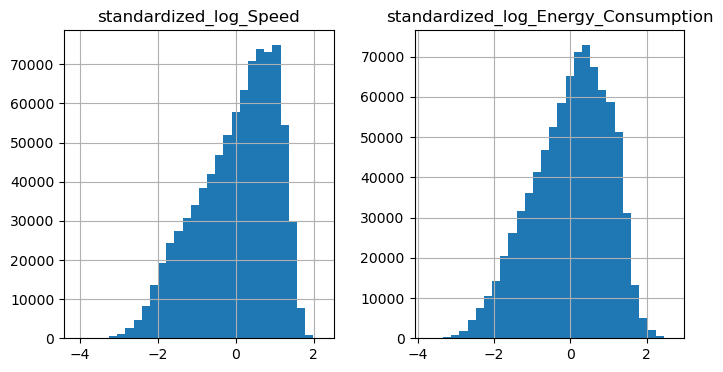

In [7]:
# 'standardized_log_Speed'와 'standardized_log_Energy_Consumption'을 함께 시각화
encoded_train[['standardized_log_Speed', 'standardized_log_Energy_Consumption']].hist(bins=30, figsize=(8, 4))

plt.show()

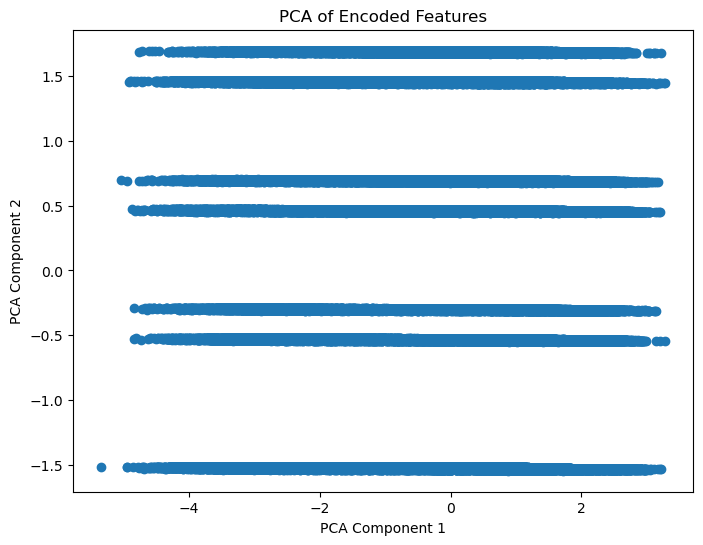

In [58]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
%matplotlib inline

X_encoded = encoded_train.values
# 인코딩된 피처 데이터 (X_encoded: 인코딩된 값들)
# 예시: X_encoded = data_encoded.values (pandas DataFrame을 사용한 인코딩된 데이터)

# PCA 적용하여 2차원으로 차원 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_encoded)

# 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title('PCA of Encoded Features')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

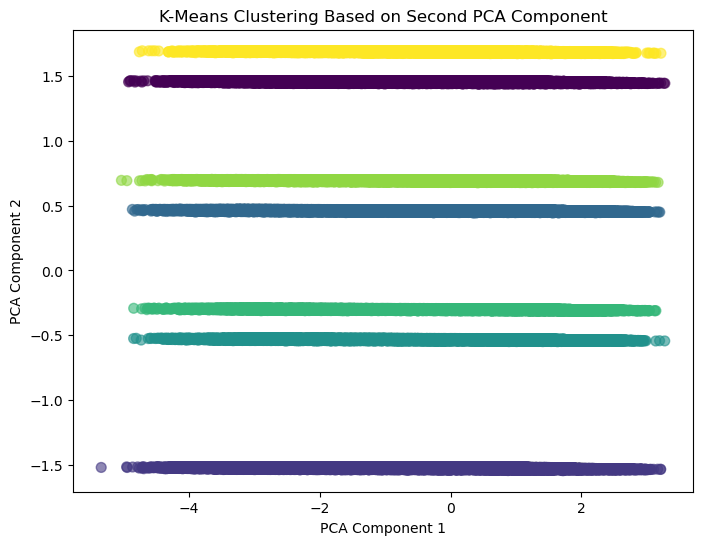

In [61]:
# 두 번째 주성분을 따로 저장
second_component = X_pca[:, 1].reshape(-1, 1)

# 두 번째 주성분을 기준으로 K-Means 클러스터링 (7개의 클러스터)
kmeans_second_component = KMeans(n_clusters=7, random_state=42)
clusters_second_component = kmeans_second_component.fit_predict(second_component)

# 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_second_component, cmap='viridis', s=50, alpha=0.6)
plt.title('K-Means Clustering Based on Second PCA Component')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [62]:
# 클러스터 중심 확인
centers = kmeans_second_component.cluster_centers_

# 두 번째 컴포넌트의 클러스터 중심값만 출력
print("Cluster centers based on second PCA component:")
print(centers)


Cluster centers based on second PCA component:
[[ 1.45277071]
 [-1.52709438]
 [ 0.45963729]
 [-0.53406325]
 [-0.3020059 ]
 [ 0.69043094]
 [ 1.68458975]]


In [63]:
# 클러스터 중심값들을 정렬 (PCA 두 번째 컴포넌트 기준)
centers_sorted = sorted(kmeans_second_component.cluster_centers_.flatten())

# 각 클러스터 중심값 사이의 중간값을 계산하여 경계값 설정
boundaries = [(centers_sorted[i] + centers_sorted[i+1]) / 2 for i in range(len(centers_sorted) - 1)]

# 경계값 출력
print("Cluster boundaries based on second PCA component:")
print(boundaries)


Cluster boundaries based on second PCA component:
[-1.0305788155401157, -0.41803457595180515, 0.07881569451166628, 0.5750341136732517, 1.0716008227639504, 1.5686802281507812]


In [91]:
# 클러스터 경계를 정의
boundaries = [-1.0305788155401157, -0.41803457595180515, 0.07881569451166628, 0.5750341136732517, 1.0716008227639504, 1.5686802281507812]

# 두 번째 PCA 성분을 기준으로 그룹화
def assign_group(value, boundaries):
    for i, boundary in enumerate(boundaries):
        if value <= boundary:
            return i
    return len(boundaries)

# 원본 인코딩된 데이터를 포함한 DataFrame 생성
encoded_df = pd.DataFrame(X_encoded, columns=encoded_train.columns)

# 두 번째 PCA 성분에 따라 그룹 라벨을 추가
encoded_df['Group'] = [assign_group(val, boundaries) for val in X_pca[:, 1]]

# 결과 확인
encoded_df.head()


,standardized_log_Speed,Is_Peak_Hour_Weighted,Random Event Occurred,standardized_log_Energy_Consumption,Weekday_Weekend,Hour_Category,City_AquaCity,City_Ecoopolis,City_MetropolisX,City_Neuroburg,...,Vehicle Type_Flying Car,Weather_Clear,Weather_Electromagnetic Storm,Weather_Rainy,Weather_Snowy,Weather_Solar Flare,Economic Condition_Booming,Economic Condition_Recession,Economic Condition_Stable,Group
0,-1.722799,2.0,0.0,-1.652465,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2
1,0.635483,0.0,0.0,0.891527,1.0,2.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3
2,1.161579,0.0,0.0,1.963706,1.0,3.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5
3,0.749723,0.0,0.0,0.903594,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5
4,1.386228,0.0,0.0,1.369804,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


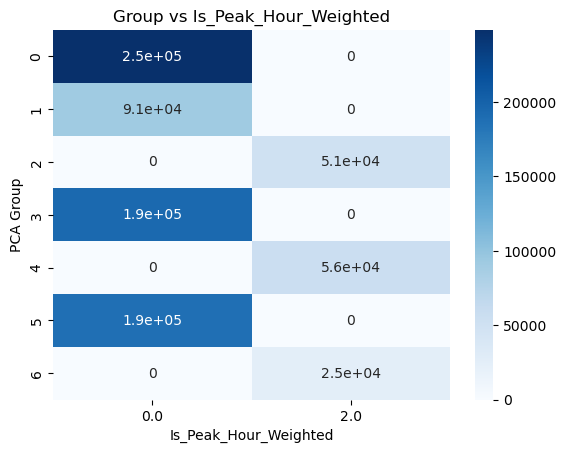

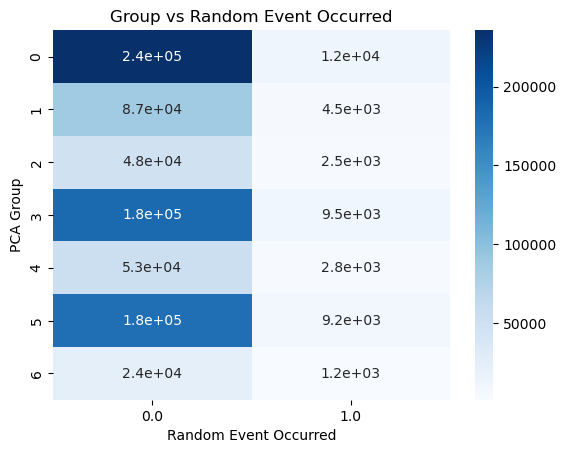

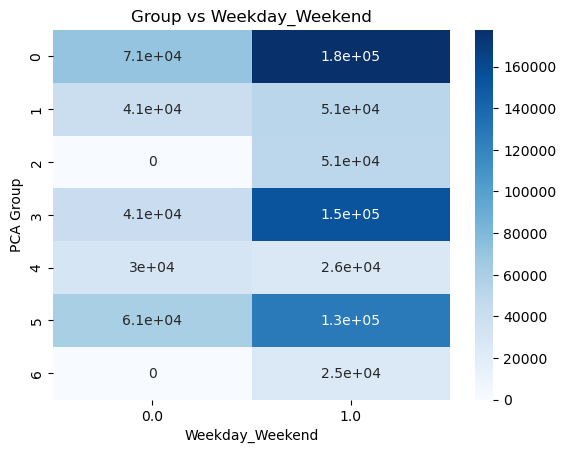

In [97]:
binary_cols = ['Is_Peak_Hour_Weighted', 'Random Event Occurred', 'Weekday_Weekend']
for col in binary_cols:
    cross_tab = pd.crosstab(encoded_df['Group'], encoded_df[col])
    sns.heatmap(cross_tab, annot=True, cmap="Blues")
    plt.title(f'Group vs {col}')
    plt.xlabel(col)
    plt.ylabel('PCA Group')
    plt.show()


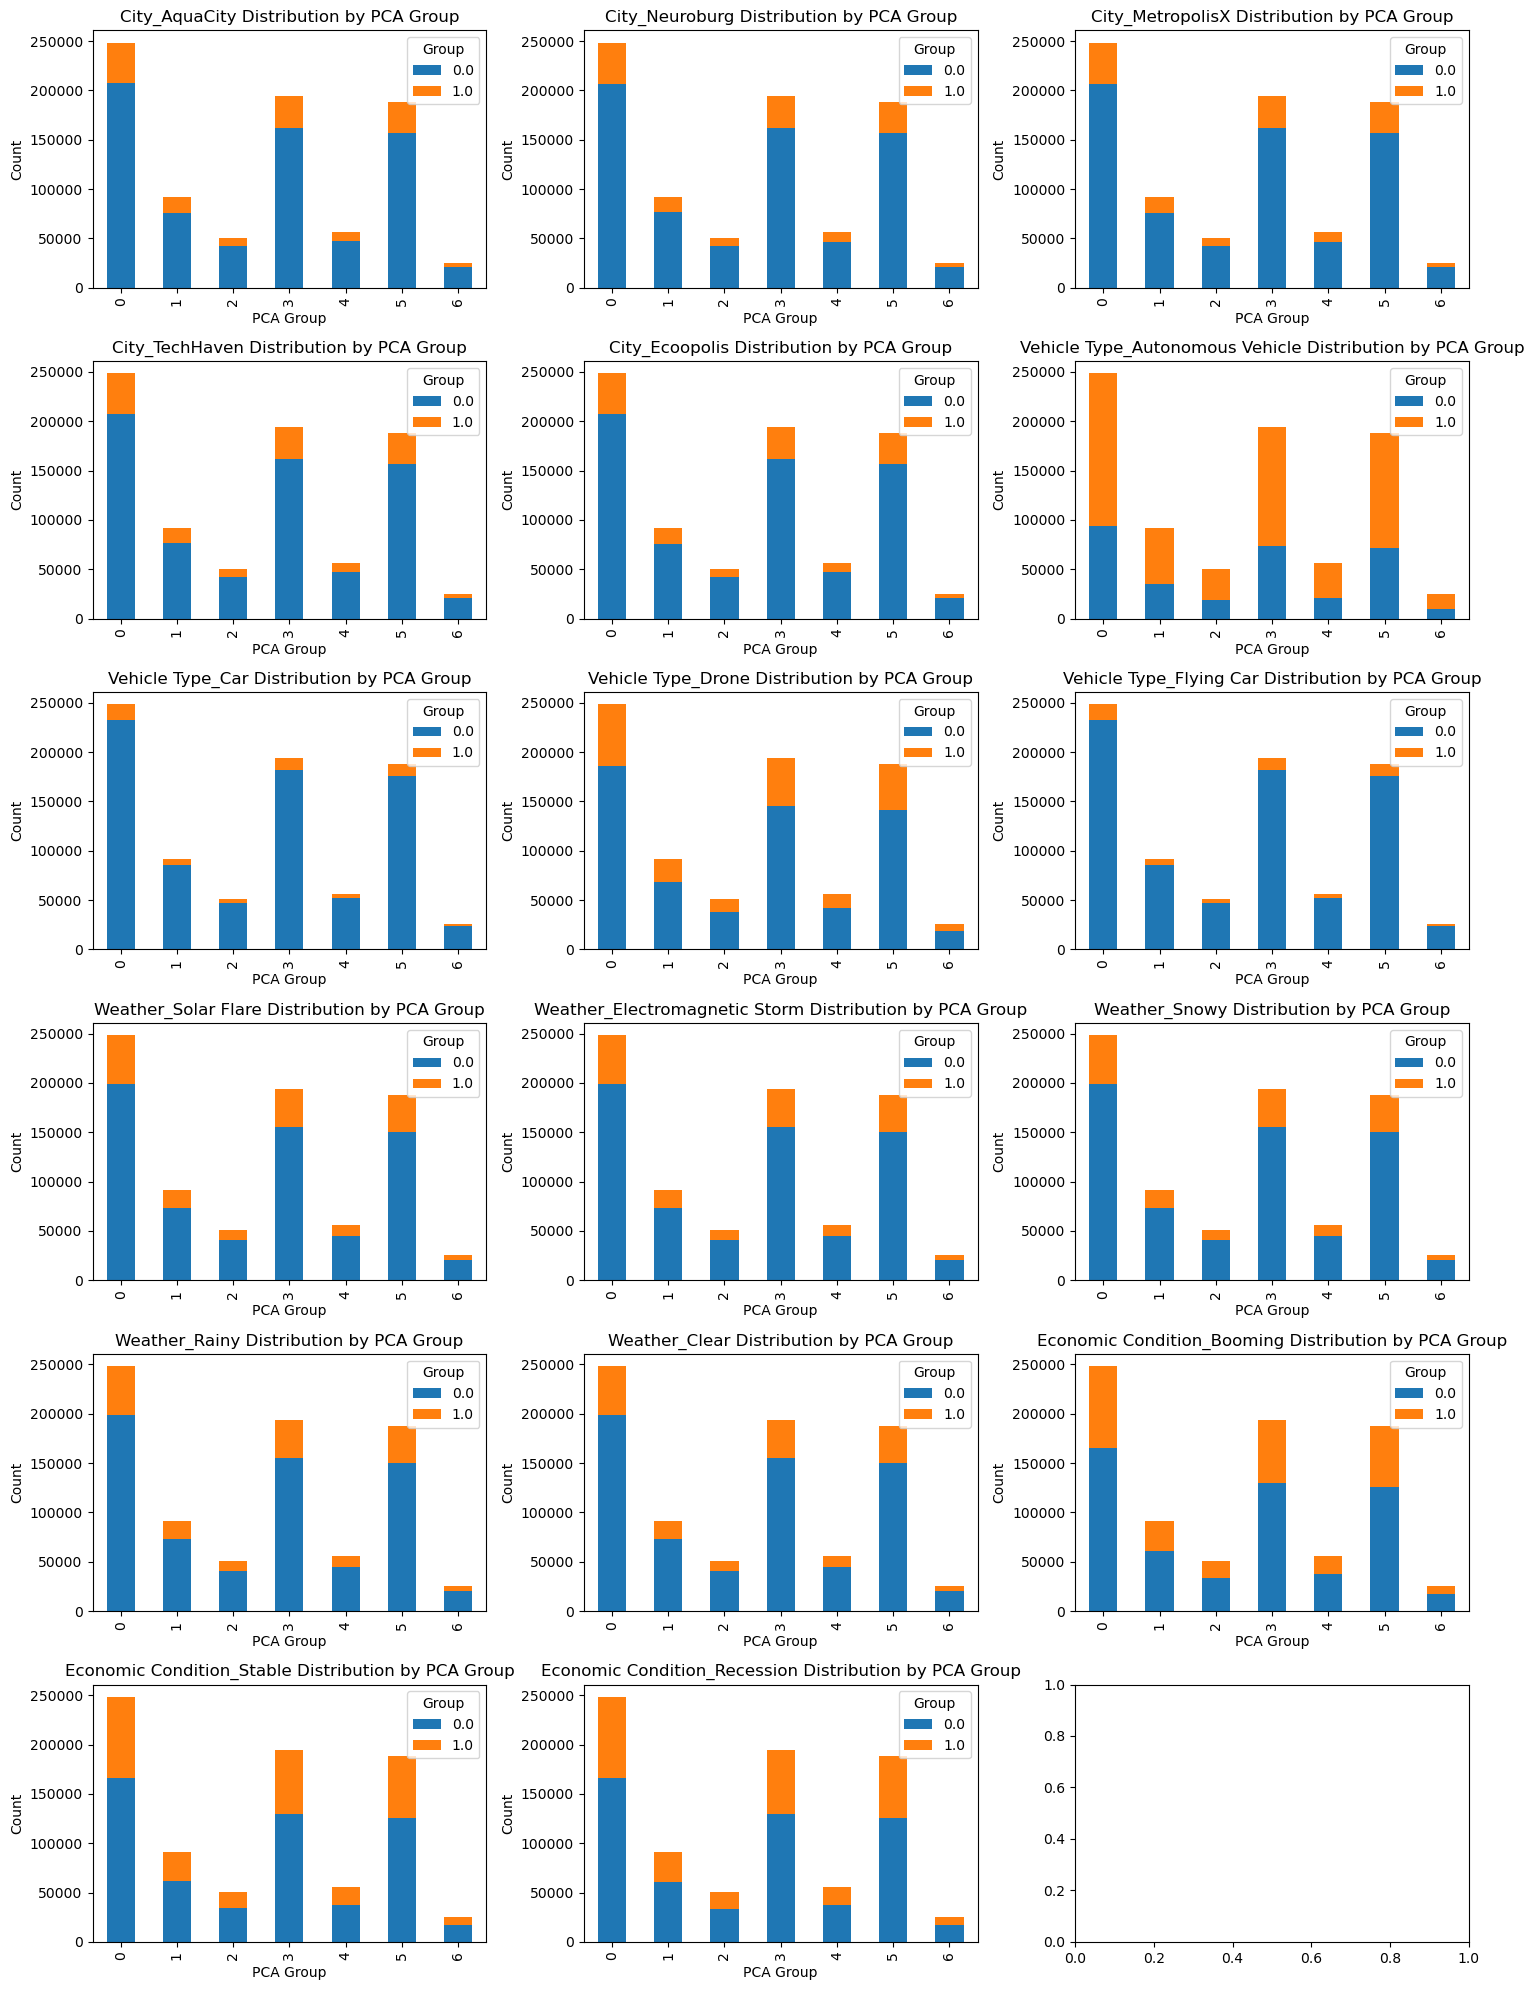

In [95]:
categorical_cols = ['City_AquaCity', 'City_Neuroburg', 'City_MetropolisX', 'City_TechHaven', 'City_Ecoopolis', 'Vehicle Type_Autonomous Vehicle', 'Vehicle Type_Car', 'Vehicle Type_Drone', 'Vehicle Type_Flying Car', 'Weather_Solar Flare', 'Weather_Electromagnetic Storm', 'Weather_Snowy', 'Weather_Rainy', 'Weather_Clear', 'Economic Condition_Booming', 'Economic Condition_Stable', 'Economic Condition_Recession']
# 서브플롯을 위한 설정
fig, axes = plt.subplots(6, 3, figsize=(15, 20))  # 6x3 그리드 생성
axes = axes.ravel()  # 축을 1D 배열로 변경

# 모든 범주형 속성에 대해 그래프 그리a기
for i, col in enumerate(categorical_cols):
    cross_tab = pd.crosstab(encoded_df['Group'], encoded_df[col])
    cross_tab.plot(kind='bar', stacked=True, ax=axes[i], legend=False)  # 각 서브플롯에 그래프 그리기
    axes[i].set_title(f'{col} Distribution by PCA Group')
    axes[i].set_xlabel('PCA Group')
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Group')  # 범례 추가

# 전체 레이아웃 조정
plt.tight_layout()
plt.show()

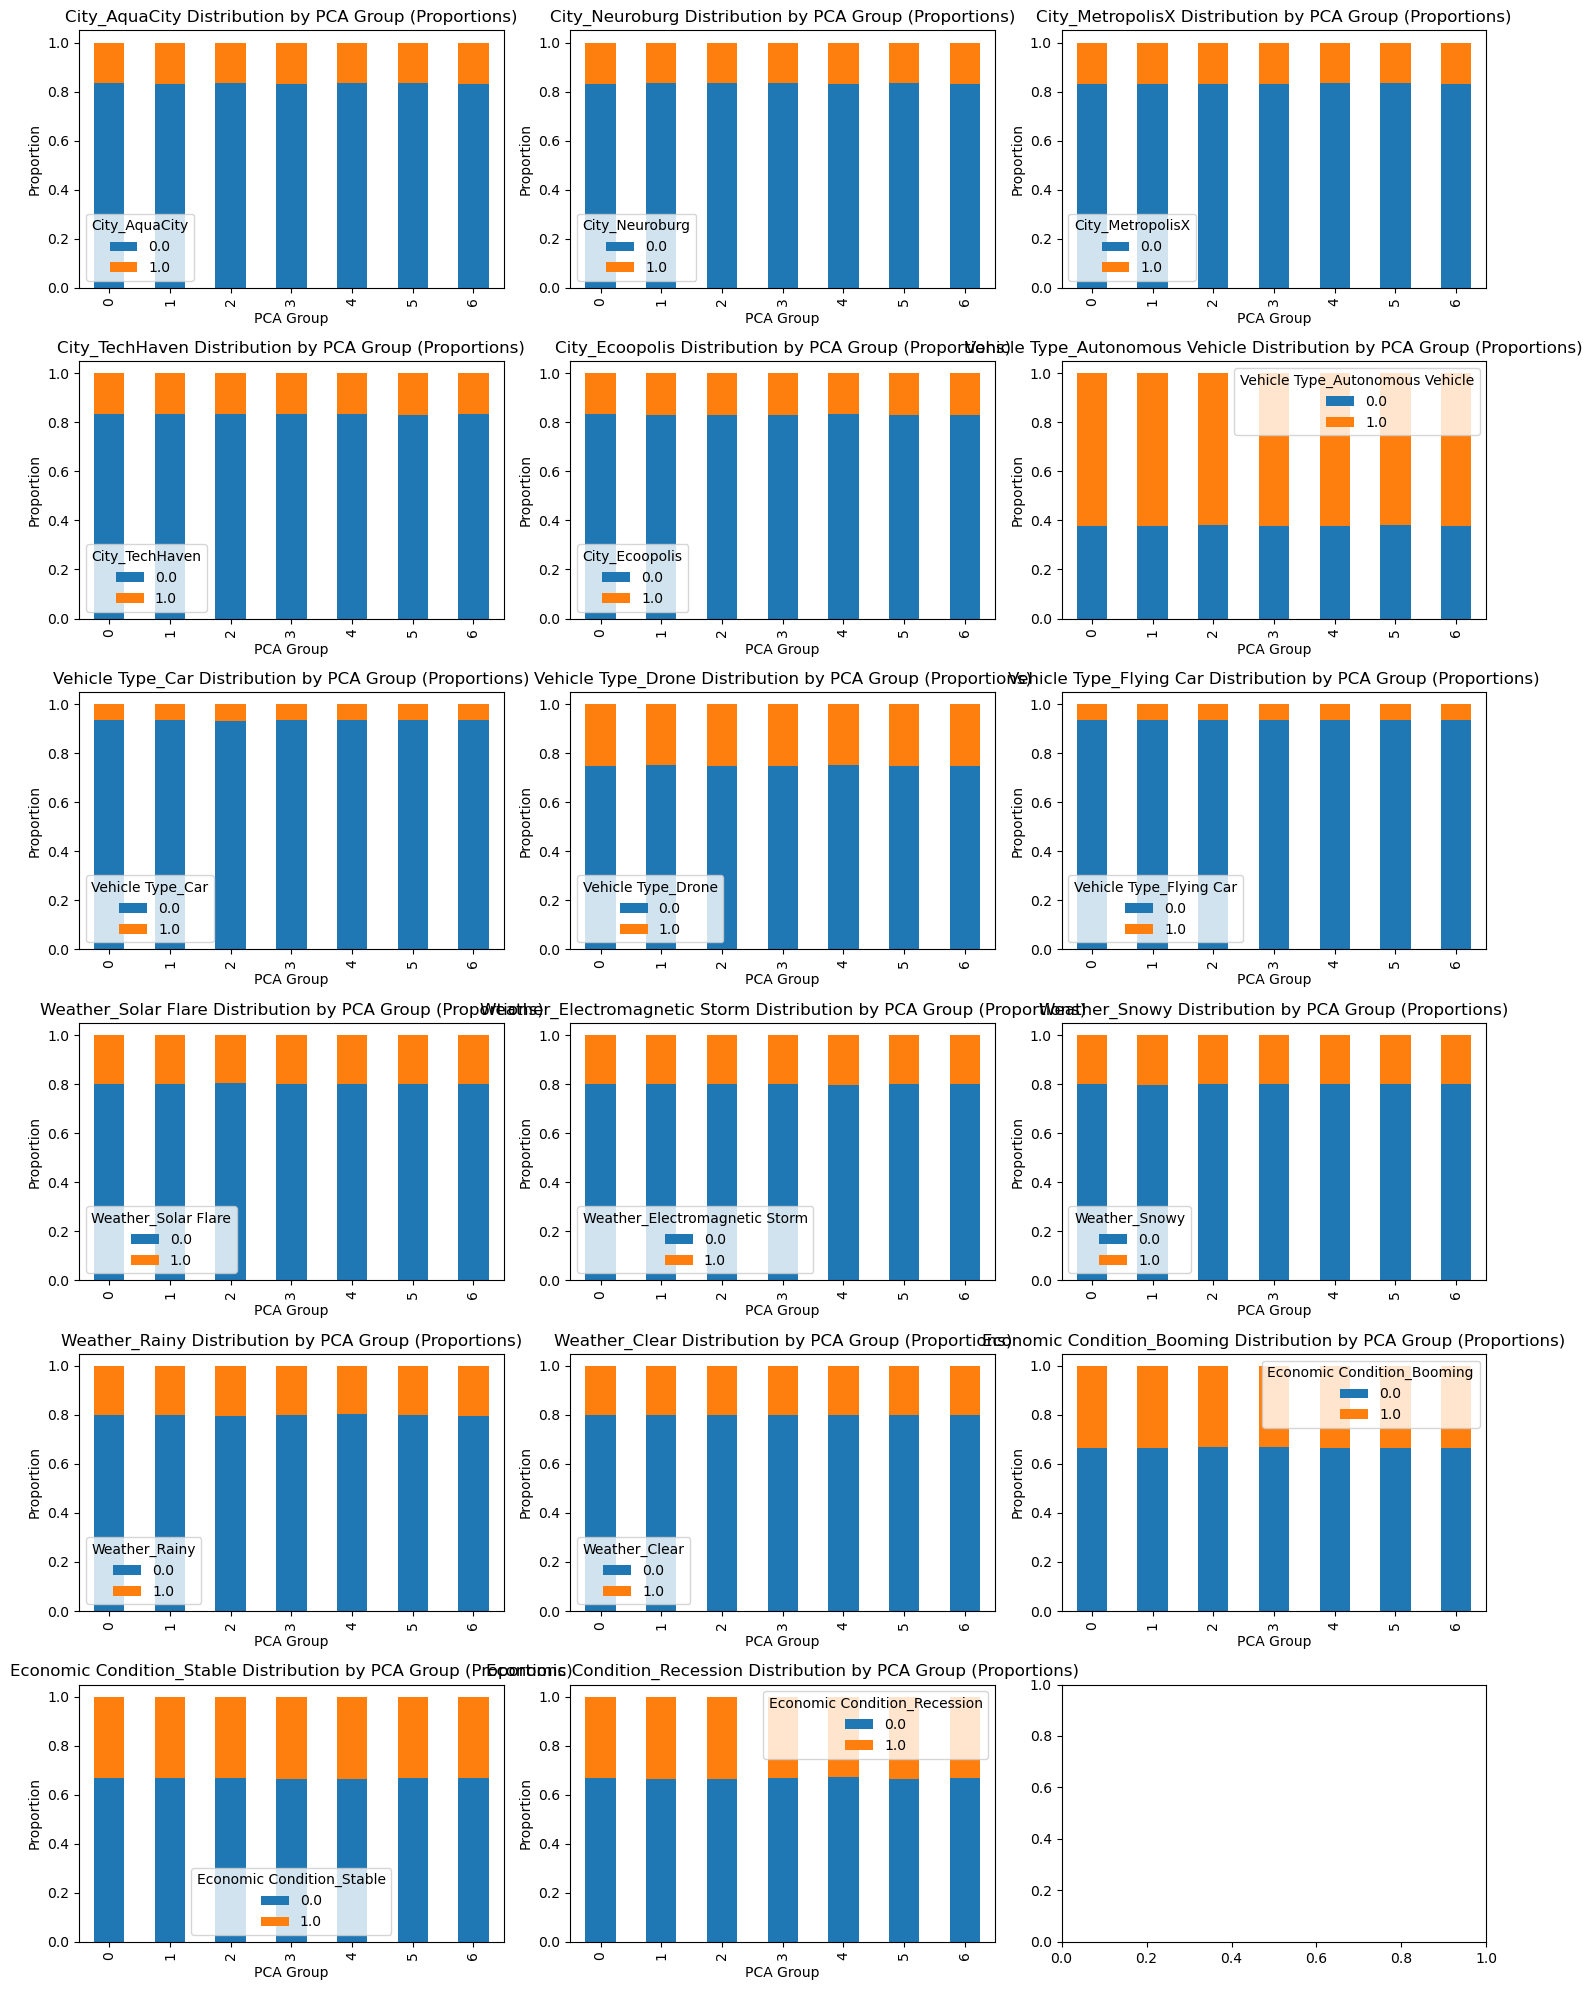

In [96]:
# 서브플롯을 위한 설정
fig, axes = plt.subplots(6, 3, figsize=(15, 20))  # 6x3 그리드 생성
axes = axes.ravel()  # 축을 1D 배열로 변경

# 모든 범주형 속성에 대해 비율 그래프 그리기
for i, col in enumerate(categorical_cols):
    cross_tab = pd.crosstab(encoded_df['Group'], encoded_df[col], normalize='index')  # 각 그룹 내 비율 계산
    cross_tab.plot(kind='bar', stacked=True, ax=axes[i])  # 각 서브플롯에 그래프 그리기
    axes[i].set_title(f'{col} Distribution by PCA Group (Proportions)')
    axes[i].set_xlabel('PCA Group')
    axes[i].set_ylabel('Proportion')
    axes[i].legend(title=col)

# 전체 레이아웃 조정
plt.tight_layout()
plt.show()

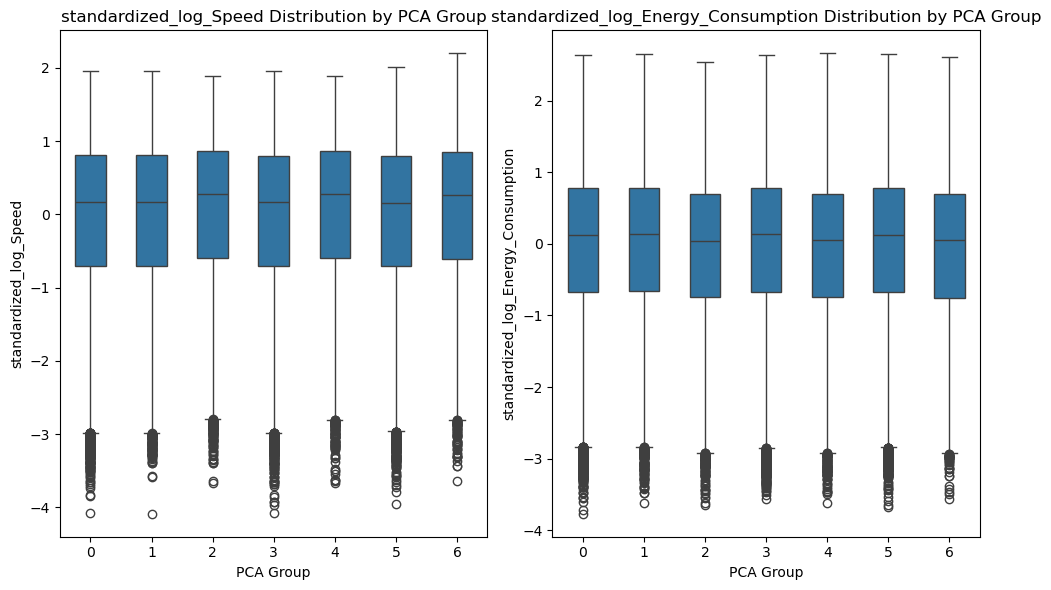

In [104]:
continuous_cols = ['standardized_log_Speed', 'standardized_log_Energy_Consumption']
# 서브플롯 설정 (2행 3열)
fig, axes = plt.subplots(1, 2, figsize=(10, 6))  # 2행 3열의 서브플롯
axes = axes.flatten()  # 2차원 배열을 1차원으로 변환

# 각 컬럼별로 박스플롯 그리기
for i, col in enumerate(continuous_cols):
    sns.boxplot(x='Group', y=col, data=encoded_df, ax=axes[i],width=0.5)
    axes[i].set_title(f'{col} Distribution by PCA Group')
    axes[i].set_xlabel('PCA Group')
    axes[i].set_ylabel(col)

# 서브플롯 간격 조정
plt.tight_layout()
plt.show()


        standardized_log_Speed  Is_Peak_Hour_Weighted  Random Event Occurred  \
0                    -1.722799                    2.0                    0.0   
1                     0.635483                    0.0                    0.0   
2                     1.161579                    0.0                    0.0   
3                     0.749723                    0.0                    0.0   
4                     1.386228                    0.0                    0.0   
...                        ...                    ...                    ...   
853691                0.666722                    0.0                    0.0   
853692               -0.006488                    0.0                    0.0   
853693                1.193541                    0.0                    0.0   
853694                1.017841                    0.0                    0.0   
853695                1.502560                    0.0                    0.0   

        standardized_log_Energy_Consump

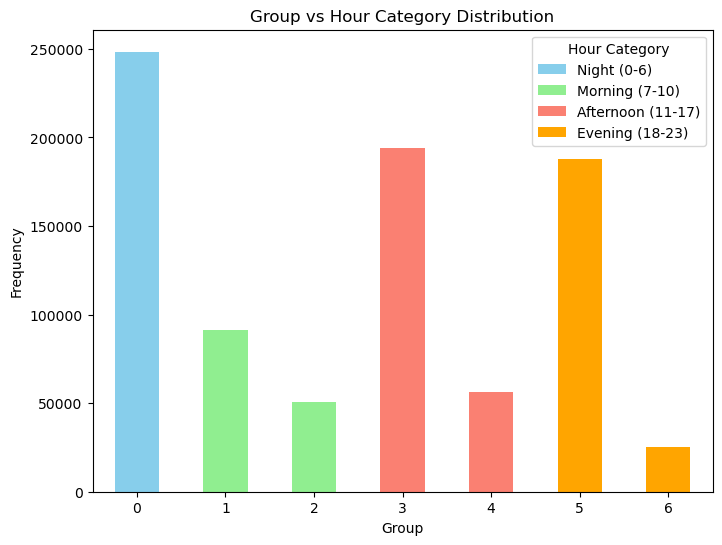

In [105]:
# Group과 Hour_Category의 빈도수를 세어 막대그래프로 그리기
grouped = encoded_df.groupby(['Group', 'Hour_Category']).size().unstack(fill_value=0)
print(encoded_df)
# 막대그래프 그리기
grouped.plot(kind='bar', stacked=True, figsize=(8, 6), color=['skyblue', 'lightgreen', 'salmon', 'orange'])
plt.title('Group vs Hour Category Distribution')
plt.xlabel('Group')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(title='Hour Category', labels=['Night (0-6)', 'Morning (7-10)', 'Afternoon (11-17)', 'Evening (18-23)'])
plt.show()

In [41]:
print(encoded_df['Group'])

0          True
1         False
2         False
3         False
4         False
          ...  
853691    False
853692    False
853693    False
853694    False
853695    False
Name: Group, Length: 853696, dtype: bool


In [47]:
import numpy as np

# 시간 복원 (0시~23시로 변환)
encoded_df['Hour_Of_Day'] = np.arctan2(encoded_df['sin_Hour_Of_Day'], encoded_df['cos_Hour_Of_Day']) * (24 / (2 * np.pi))
# 24시 기준으로 시간 값을 맞추기
encoded_df['Hour_Of_Day'] = encoded_df['Hour_Of_Day'] % 24

# 요일 복원 (0: Sunday ~ 6: Saturday)
encoded_df['Day_Of_Week'] = np.arctan2(encoded_df['sin_Day_Of_Week'], encoded_df['cos_Day_Of_Week']) * (7 / (2 * np.pi))
encoded_df['Day_Of_Week'] = encoded_df['Day_Of_Week'] % 7


In [48]:
# 그룹화 (True/False)
true_group = encoded_df[encoded_df['Group'] == True]
false_group = encoded_df[encoded_df['Group'] == False]


In [49]:
print(true_group)

        standardized_log_Speed  Is_Peak_Hour_Weighted  Random Event Occurred  \
0                    -1.722799                    2.0                    0.0   
13                   -0.094684                    2.0                    0.0   
15                    0.507722                    2.0                    0.0   
22                   -0.964455                    2.0                    0.0   
40                    0.793655                    2.0                    0.0   
...                        ...                    ...                    ...   
853660               -0.692070                    2.0                    0.0   
853668               -0.781232                    2.0                    0.0   
853672                0.183279                    2.0                    0.0   
853675                1.317603                    2.0                    0.0   
853686               -0.162267                    2.0                    0.0   

        standardized_log_Energy_Consump

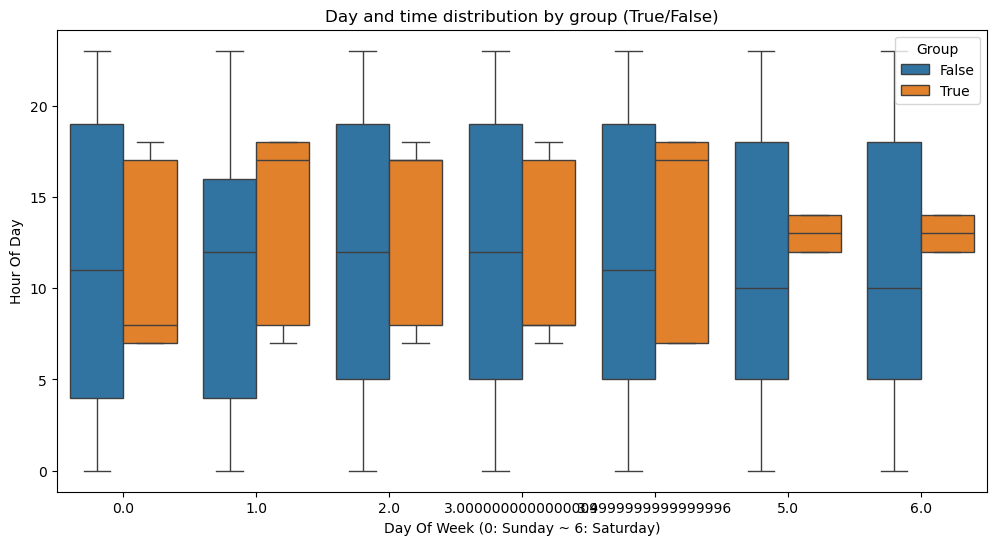

In [52]:
# 시간대 분포 시각화
plt.figure(figsize=(12, 6))
sns.boxplot(x='Day_Of_Week', y='Hour_Of_Day', hue='Group', data=encoded_df)
plt.title('Day and time distribution by group (True/False)')
plt.ylabel('Hour Of Day')
plt.xlabel('Day Of Week (0: Sunday ~ 6: Saturday)')
plt.show()

In [46]:
# 그룹별 통계치 계산
group_stats = encoded_df.groupby('Group')['Hour_Of_Day'].describe()

# 결과 출력
print(group_stats)


          count       mean       std  min  25%   50%   75%   max
Group                                                           
False  721722.0  11.303456  7.264422  0.0  5.0  11.0  18.0  23.0
True   131974.0  12.627177  4.429128  7.0  8.0  13.0  17.0  18.0


In [124]:
encoded_df.head()

,standardized_log_Speed,Is_Peak_Hour_Weighted,Random Event Occurred,standardized_log_Energy_Consumption,Weekday_Weekend,Hour_Category,City_AquaCity,City_Ecoopolis,City_MetropolisX,City_Neuroburg,...,Vehicle Type_Flying Car,Weather_Clear,Weather_Electromagnetic Storm,Weather_Rainy,Weather_Snowy,Weather_Solar Flare,Economic Condition_Booming,Economic Condition_Recession,Economic Condition_Stable,Group
0,-1.722799,2.0,0.0,-1.652465,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2
1,0.635483,0.0,0.0,0.891527,1.0,2.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3
2,1.161579,0.0,0.0,1.963706,1.0,3.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5
3,0.749723,0.0,0.0,0.903594,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5
4,1.386228,0.0,0.0,1.369804,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [125]:
## 코사인유사도를 쓰지만, 0.8 가중치 이상만 엣지를 남긴다.
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import lil_matrix
selected_features = [ 'Is_Peak_Hour_Weighted', 'Weekday_Weekend',  'Hour_Category']
sampled_df = encoded_train[selected_features].sample(n=20000, random_state=42)

# 데이터 프레임에서 값을 numpy 배열로 변환
data = sampled_df.values

# 배치 크기 설정
batch_size = 1000  # 배치 크기 설정
num_rows = data.shape[0]
threshold = 0.8  # 임계값 설정

# 희소 행렬 초기화 (LIL 포맷: 효율적으로 값을 추가/수정할 수 있음)
cosine_sim_matrix_sparse = lil_matrix((num_rows, num_rows))

# 배치로 나누어 계산
for i in range(0, num_rows, batch_size):
    end_i = min(i + batch_size, num_rows)
    for j in range(0, num_rows, batch_size):
        end_j = min(j + batch_size, num_rows)
        
        # 현재 배치의 코사인 유사도 계산
        cosine_sim_batch = cosine_similarity(data[i:end_i], data[j:end_j])
        
        # 임계값 적용 (0.8 이상만 남기기)
        cosine_sim_batch_thresholded = (cosine_sim_batch > threshold) * cosine_sim_batch
        
        # 임계값을 넘는 값들만 희소 행렬에 저장
        cosine_sim_matrix_sparse[i:end_i, j:end_j] = cosine_sim_batch_thresholded

# 희소 행렬을 CSR 포맷으로 변환하여 효율적으로 저장 및 계산 가능하게 변경
cosine_sim_matrix_sparse_csr = cosine_sim_matrix_sparse.tocsr()

# 희소 행렬을 데이터프레임으로 변환 (필요할 경우)
adj_matrix_df = pd.DataFrame.sparse.from_spmatrix(cosine_sim_matrix_sparse_csr, 
                                                  index=sampled_df.index, 
                                                  columns=sampled_df.index)

# 결과 출력 (선택 사항)
print(adj_matrix_df)

        27334     37259     826046    245531  143772  89600     676591  \
27334        0         0         0         0       0       0         0   
37259        0       1.0  0.894427       1.0       0       0       1.0   
826046       0  0.894427       1.0  0.894427       0       0  0.894427   
245531       0       1.0  0.894427       1.0       0       0       1.0   
143772       0         0         0         0     1.0     1.0         0   
...        ...       ...       ...       ...     ...     ...       ...   
361605       0  0.894427       1.0  0.894427       0       0  0.894427   
764072       0  0.894427       1.0  0.894427       0       0  0.894427   
660034       0         0         0         0       0       0         0   
58304        0  0.801784   0.83666  0.801784       0       0  0.801784   
659826       0         0         0         0     1.0     1.0         0   

          220270  100313  565677  ...  624183    195846    709964    234871  \
27334          0       0       0

In [147]:
from torch_geometric.data import Data
from torch_geometric.utils.convert import to_networkx
def construct_graph(data_encoded, edges, light=False, max_nodes=50):
    # pandas DataFrame을 numpy array로 변환한 후 리스트로 변환
    if isinstance(data_encoded, pd.DataFrame):
        node_features_list = data_encoded.to_numpy().tolist()
    else:
        raise TypeError("data_encoded must be a pandas DataFrame")

    # 노드 피처를 텐서로 변환
    node_features = torch.tensor(node_features_list, dtype=torch.float)
    print(f"node_features : {node_features}")
    
    # 엣지 인덱스를 추출: 0이 아닌 값을 기준으로 엣지 인덱스 생성
    print(f"edges : {edges}")
    edge_index_tuple = np.nonzero(edges.to_numpy())  # 0이 아닌 값들의 인덱스 추출
    print(f"edge_index_tuple : {edge_index_tuple}")
    
    # 엣지 인덱스를 텐서로 변환
    edge_index = torch.tensor(np.vstack(edge_index_tuple), dtype=torch.long)  # (2, num_edges)
    print(f"edge_index : {edge_index}")
    
    # 전체 그래프 (노드 수 제한 없음)
    g = Data(x=node_features, edge_index=edge_index)
    
    #    # g_light 그래프는 노드 수를 200개로 제한하고, 해당 노드에 연결된 모든 엣지를 포함
    limited_node_indices = torch.arange(min(max_nodes, node_features.shape[0]))  # 200개의 노드 인덱스
    limited_node_features = node_features[limited_node_indices]
    
    # 선택된 노드에 연결된 모든 엣지 추출
    mask = (edge_index[0, :] < max_nodes) & (edge_index[1, :] < max_nodes)
    limited_edge_index = edge_index[:, mask]

    # g_light 생성
    g_light = Data(x=limited_node_features[:, 0:2], edge_index=limited_edge_index)
    
    print(f"g_light : {g_light}")
    
    if light:
        return g_light
    else:
        return g

In [127]:
from torch_geometric.nn import GCNConv
import torch.nn.functional as F

class TGCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(TGCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)
        
        # GRU를 추가하여 시계열 데이터를 처리
        self.gru = nn.GRU(out_channels, out_channels, batch_first=True)
    
    def forward(self, x, edge_index, h):
        # 첫 번째 GCN 레이어
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        
        # 두 번째 GCN 레이어
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        
        # 시계열 처리 (GRU 사용)
        # x의 형태는 [batch_size, sequence_length, num_features]가 되어야 함
        x, h = self.gru(x.unsqueeze(1), h)  # unsqueeze(1)로 시계열 차원 추가
        
        return x.squeeze(1), h  # 다시 차원을 맞춰줌


In [156]:
g =construct_graph(data_encoded=sampled_df,edges=adj_matrix_df,light=False)
g_light =construct_graph(data_encoded=sampled_df,edges=adj_matrix_df,light=True)
model = TGCN(in_channels=3, hidden_channels=4, out_channels=1)

# GRU 초기 hidden state
h = torch.zeros(1, g.x.size(0), 1)  # GRU의 초기 hidden state, 배치 크기 1, 노드 개수에 맞춤
     
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.MSELoss()


node_features : tensor([[0., 0., 0.],
        [0., 0., 3.],
        [0., 1., 2.],
        ...,
        [0., 0., 0.],
        [2., 1., 3.],
        [0., 1., 0.]])
edges :         27334     37259     826046    245531  143772  89600     676591  \
27334        0         0         0         0       0       0         0   
37259        0       1.0  0.894427       1.0       0       0       1.0   
826046       0  0.894427       1.0  0.894427       0       0  0.894427   
245531       0       1.0  0.894427       1.0       0       0       1.0   
143772       0         0         0         0     1.0     1.0         0   
...        ...       ...       ...       ...     ...     ...       ...   
361605       0  0.894427       1.0  0.894427       0       0  0.894427   
764072       0  0.894427       1.0  0.894427       0       0  0.894427   
660034       0         0         0         0       0       0         0   
58304        0  0.801784   0.83666  0.801784       0       0  0.801784   
659826       0  

In [149]:
g_light =construct_graph(data_encoded=sampled_df,edges=adj_matrix_df,light=True)

node_features : tensor([[0., 0., 0.],
        [0., 0., 3.],
        [0., 1., 2.],
        ...,
        [0., 0., 0.],
        [2., 1., 3.],
        [0., 1., 0.]])
edges :         27334     37259     826046    245531  143772  89600     676591  \
27334        0         0         0         0       0       0         0   
37259        0       1.0  0.894427       1.0       0       0       1.0   
826046       0  0.894427       1.0  0.894427       0       0  0.894427   
245531       0       1.0  0.894427       1.0       0       0       1.0   
143772       0         0         0         0     1.0     1.0         0   
...        ...       ...       ...       ...     ...     ...       ...   
361605       0  0.894427       1.0  0.894427       0       0  0.894427   
764072       0  0.894427       1.0  0.894427       0       0  0.894427   
660034       0         0         0         0       0       0         0   
58304        0  0.801784   0.83666  0.801784       0       0  0.801784   
659826       0  

[[1, 1], [1, 2], [1, 3], [1, 6], [1, 7], [1, 11], [1, 12], [1, 13], [1, 15], [1, 18], [1, 20], [1, 21], [1, 23], [1, 25], [1, 26], [1, 27], [1, 28], [1, 29], [1, 32], [1, 37], [1, 41], [1, 43], [1, 45], [2, 1], [2, 2], [2, 3], [2, 6], [2, 7], [2, 11], [2, 12], [2, 13], [2, 15], [2, 18], [2, 20], [2, 21], [2, 23], [2, 25], [2, 26], [2, 27], [2, 28], [2, 29], [2, 31], [2, 32], [2, 37], [2, 41], [2, 43], [2, 45], [2, 47], [3, 1], [3, 2], [3, 3], [3, 6], [3, 7], [3, 11], [3, 12], [3, 13], [3, 15], [3, 18], [3, 20], [3, 21], [3, 23], [3, 25], [3, 26], [3, 27], [3, 28], [3, 29], [3, 32], [3, 37], [3, 41], [3, 43], [3, 45], [4, 4], [4, 5], [4, 8], [4, 9], [4, 10], [4, 17], [4, 19], [4, 22], [4, 30], [4, 33], [4, 38], [4, 44], [4, 46], [4, 49], [5, 4], [5, 5], [5, 8], [5, 9], [5, 10], [5, 17], [5, 19], [5, 22], [5, 30], [5, 33], [5, 38], [5, 44], [5, 46], [5, 49], [6, 1], [6, 2], [6, 3], [6, 6], [6, 7], [6, 11], [6, 12], [6, 13], [6, 15], [6, 18], [6, 20], [6, 21], [6, 23], [6, 25], [6, 26], [

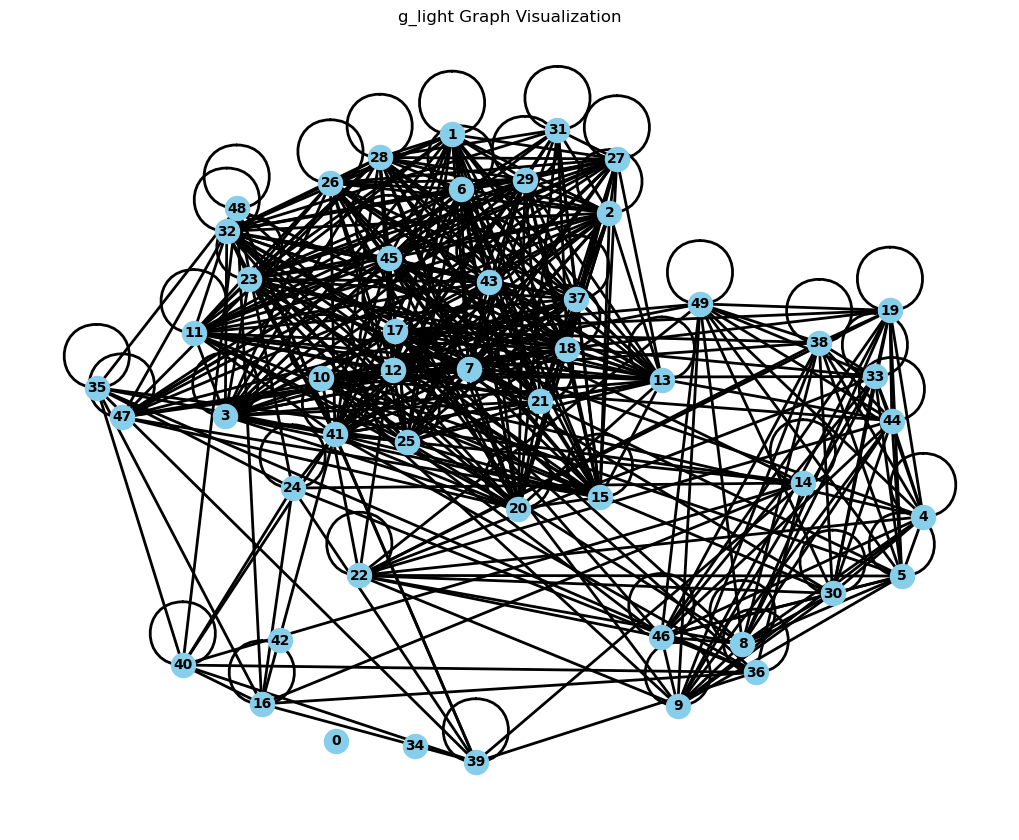

In [150]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_graph(g_light):
    # 그래프 생성
    G = nx.Graph()

    # 노드 추가
    num_nodes = g_light.x.shape[0]
    G.add_nodes_from(range(num_nodes))

    # 엣지 추가 (edge_index는 (2, num_edges) 형태)
    edge_list = g_light.edge_index.t().tolist()  # 엣지 리스트로 변환
    print(edge_list)
    G.add_edges_from(edge_list)

 # 그래프 그리기
    pos = nx.spring_layout(G, k=2)  # 노드 간의 간격을 조정
    plt.figure(figsize=(10, 8))
    # 노드 및 엣지 그리기, 엣지 굵기와 색상을 추가
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=300, edge_color='black', width=2, font_size=10, font_weight='bold')
    plt.title("g_light Graph Visualization")
    plt.show()

# g_light 그래프 그리기 호출
draw_graph(g_light)


In [157]:
sampled_indices = sampled_df.index
sampled_density = train_df.loc[sampled_indices, 'Traffic Density']
target_density = torch.tensor(sampled_density.values, dtype=torch.float)
print(f"target density : {target_density}")

target density : tensor([0.1662, 0.0324, 0.2033,  ..., 0.0226, 0.2374, 0.1438])


In [163]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

def train(data, target_density, h, epochs=200):
    torch.autograd.set_detect_anomaly(True)
    model.train()

    # Loss와 R² 값을 기록할 리스트
    losses = []
    r2_scores = []

    for epoch in range(epochs):
        optimizer.zero_grad()
        # GCN 모델에 입력 데이터와 엣지 인덱스 전달
        out, h = model(data.x, data.edge_index, h)  # h를 전달합니다.
        
        # 예측값과 실제 값을 비교하는 손실 계산
        loss = criterion(out.squeeze(), target_density)
        loss.backward(retain_graph=True)
        optimizer.step()

        # 매 에포크마다 손실과 R² 값을 저장
        losses.append(loss.item())
        r2 = r2_score(target_density.detach().numpy(), out.detach().squeeze().numpy())
        r2_scores.append(r2)

        if epoch % 20 == 0:
            print(f'Epoch {epoch}, Loss: {loss.item()}, R²: {r2:.4f}')

    # 학습 후 Loss와 R² 그래프 그리기
    plt.figure(figsize=(12, 5))

    # Loss 그래프
    plt.subplot(1, 2, 1)
    plt.plot(range(epochs), losses, label='Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss over Epochs')
    plt.legend()

    # R² 그래프
    plt.subplot(1, 2, 2)
    plt.plot(range(epochs), r2_scores, label='R² Score', color='orange')
    plt.xlabel('Epochs')
    plt.ylabel('R² Score')
    plt.title('R² Score over Epochs')
    plt.legend()

    plt.tight_layout()
    plt.show()



In [164]:
h = torch.zeros(1, g.x.size(0), 1,requires_grad=True) 
train(g, target_density, h)

Epoch 0, Loss: 0.11828184872865677, R²: -1.4852


/home/younggun0816/anaconda3/envs/mll/lib/python3.11/site-packages/torch/autograd/graph.py:769: UserWarning: Error detected in AddmmBackward0. Traceback of forward call that caused the error:
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/younggun0816/anaconda3/envs/mll/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/home/younggun0816/anaconda3/envs/mll/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/home/younggun0816/anaconda3/envs/mll/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 739, in start
    self.io_loop.start()
  File "/home/younggun0816/anaconda3/envs/mll/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 205, in start
    self.asyncio_loop.run_forever()
  File "/home/younggun0816/anaconda3/envs/mll/lib/python3.11/asyncio/base_events.py", line 608

RuntimeError: one of the variables needed for gradient computation has been modified by an inplace operation: [torch.FloatTensor [1, 3]], which is output 0 of AsStridedBackward0, is at version 5; expected version 4 instead. Hint: the backtrace further above shows the operation that failed to compute its gradient. The variable in question was changed in there or anywhere later. Good luck!

In [81]:
test_sampled_df = encoded_train[selected_features].drop(sampled_df.index).sample(n=20000, random_state=42)
# 데이터 프레임에서 값을 numpy 배열로 변환
test_data = test_sampled_df.values

# 배치 크기 설정
batch_size = 1000  # 배치 크기 설정
num_rows = test_data.shape[0]
threshold = 0.8  # 임계값 설정

# 희소 행렬 초기화 (LIL 포맷: 효율적으로 값을 추가/수정할 수 있음)
cosine_sim_test_matrix_sparse = lil_matrix((num_rows, num_rows))
# 배치로 나누어 계산
for i in range(0, num_rows, batch_size):
    end_i = min(i + batch_size, num_rows)
    for j in range(0, num_rows, batch_size):
        end_j = min(j + batch_size, num_rows)
        
        # 현재 배치의 코사인 유사도 계산
        cosine_sim_batch = cosine_similarity(test_data[i:end_i], test_data[j:end_j])
        
        # 임계값 적용 (0.8 이상만 남기기)
        cosine_sim_batch_thresholded = (cosine_sim_batch > threshold) * cosine_sim_batch
        
        # 임계값을 넘는 값들만 희소 행렬에 저장
        cosine_sim_test_matrix_sparse[i:end_i, j:end_j] = cosine_sim_batch_thresholded

# 희소 행렬을 CSR 포맷으로 변환하여 효율적으로 저장 및 계산 가능하게 변경
cosine_sim_test_matrix_sparse_csr = cosine_sim_test_matrix_sparse.tocsr()

# 희소 행렬을 데이터프레임으로 변환
adj_matrix_test_df = pd.DataFrame.sparse.from_spmatrix(cosine_sim_test_matrix_sparse_csr, 
                                                       index=test_sampled_df.index, 
                                                       columns=test_sampled_df.index)

# 생성된 인접 행렬을 사용하여 그래프 생성
test_graph = construct_graph(data_encoded=test_sampled_df, edges=adj_matrix_test_df, light=False)

# 결과 출력 (선택 사항)
print(adj_matrix_test_df)

node_features : tensor([[0., 0., 0.],
        [0., 0., 3.],
        [0., 1., 1.],
        ...,
        [0., 0., 3.],
        [0., 1., 1.],
        [0., 1., 0.]])
edges :         191523    838002    418134    837632  331130  89139   504980  \
191523       0         0         0         0       0       0       0   
838002       0       1.0         0  0.894427       0       0       0   
418134       0         0       1.0  0.948683       0       0       0   
837632       0  0.894427  0.948683       1.0       0       0       0   
331130       0         0         0         0     1.0     1.0       0   
...        ...       ...       ...       ...     ...     ...     ...   
101820       0         0         0         0     1.0     1.0       0   
569629       0         0         0         0     1.0     1.0       0   
313228       0       1.0         0  0.894427       0       0       0   
115382       0         0       1.0  0.948683       0       0       0   
567315       0         0         0    

In [82]:
# 테스트용 샘플의 인덱스를 추출
test_sampled_indices = test_sampled_df.index

# 테스트용 타겟 밀도 값을 가져옴
test_sampled_density = train_df.loc[test_sampled_indices, 'Traffic Density']

# 텐서로 변환
target_density_test = torch.tensor(test_sampled_density.values, dtype=torch.float)
print(f"target_density_test : {target_density_test}")

target_density_test : tensor([0.8741, 0.0486, 0.1964,  ..., 0.6318, 0.0734, 0.0708])


In [89]:
from sklearn.metrics import r2_score

def evaluate_model(test_graph, target_density_test):
    model.eval()  # 모델을 평가 모드로 전환
    with torch.no_grad():  # 평가 시에는 gradient 계산을 하지 않음
        out = model(test_graph.x, test_graph.edge_index)  # GCN 모델에 테스트 데이터 입력
        out = out.squeeze()  # 예측 결과를 동일한 크기로 맞춤
        
        # MSE 손실 계산
        test_loss = criterion(out, target_density_test)  
        
        # R^2 계산
        r2 = r2_score(target_density_test.cpu().numpy(), out.cpu().numpy())  # R^2 계산
        
        print(f'Test Loss (MSE): {test_loss.item()}')
        print(f'R^2 Score: {r2}')
    
    return test_loss.item(), r2

# 예시 타겟 값 (테스트 데이터의 타겟 밀도 값을 설정)
evaluate_model(test_graph, target_density_test)


Test Loss (MSE): 0.04713895171880722
R^2 Score: -0.0012077093124389648


(0.04713895171880722, -0.0012077093124389648)

In [21]:
mean_density = train_df['Traffic Density'].mean()
std_density = train_df['Traffic Density'].std()

print(f"Mean Traffic Density: {mean_density}")
print(f"Standard Deviation of Traffic Density: {std_density}")

Mean Traffic Density: 0.27711380198571867
Standard Deviation of Traffic Density: 0.2191563931075477


In [85]:
# 테스트 그래프의 노드 피처 행렬 (X)와 엣지 정보 (edge_index)를 준비
# test_graph는 그래프의 노드 피처와 엣지 정보를 포함
test_features = test_graph.x  # 테스트 노드의 피처 행렬
test_edge_index = test_graph.edge_index  # 테스트 그래프의 엣지 리스트 (또는 인접 행렬)

print(f"test_features : {test_features}")
print(f"test_edge_index : {test_edge_index}")

test_features : tensor([[0., 0., 0.],
        [0., 0., 3.],
        [0., 1., 1.],
        ...,
        [0., 0., 3.],
        [0., 1., 1.],
        [0., 1., 0.]])
test_edge_index : tensor([[    1,     1,     1,  ..., 19999, 19999, 19999],
        [    1,     3,     7,  ..., 19995, 19996, 19999]])


In [86]:
# GCN 모델을 사용한 예측
with torch.no_grad():  # 평가 시에는 기울기를 계산하지 않음
    predicted_values = model(test_features, test_edge_index)

# 결과 출력 또는 저장
print(predicted_values)

tensor([[0.2901],
        [0.2703],
        [0.2405],
        ...,
        [0.2703],
        [0.2405],
        [0.2766]])


In [87]:
predicted_values0 = predicted_values.squeeze().numpy()
sub_df = pd.DataFrame({'index': range(len(predicted_values0)), 'predicted_density': predicted_values0})
# CSV 파일로 저장
print(f"sub_df : {sub_df}")
# df.to_csv('predicted_density.csv', index=False)

print("Tensor가 CSV 파일로 저장되었습니다.")

sub_df :        index  predicted_density
0          0           0.290124
1          1           0.270321
2          2           0.240475
3          3           0.266454
4          4           0.276564
...      ...                ...
19995  19995           0.276564
19996  19996           0.276564
19997  19997           0.270321
19998  19998           0.240475
19999  19999           0.276564

[20000 rows x 2 columns]
Tensor가 CSV 파일로 저장되었습니다.


In [88]:
from sklearn.metrics import r2_score

# 실제 값과 예측 값이 있는 데이터프레임에서 값을 가져옵니다.
# 'actual_density'는 실제 값, 'predicted_density'는 예측 값이라고 가정합니다.
actual_values = test_sampled_density
predicted_values = sub_df['predicted_density']
# R² 결정계수 계산
r2 = r2_score(actual_values, predicted_values)

# R² 값 출력
print(f"R² 결정계수: {r2}")

R² 결정계수: -0.0012076362397370755
